# PISA 2012 Dataset Exploration 
## by Maryse Bonhomme

## Preliminary Wrangling

> PISA is the [OECD's](https://en.wikipedia.org/wiki/OECD) Program for International Students Assessment. The goal of the Program is to assess 15 years old in order to evaluate their skills in Math, Reading and Science. And more importantly to evaluate how prepared to the future they are by asking all sort of questions.
The Survey is done by PISA every 3 years, and assess various areas of the 15 years old. They assess the students life both inside school and out of school, including at home. Asking questions about possessions, family context and even how much mental stimulation the students get (cognitive activity).<p>The dataset that will be used today for analysis is the PISA 2012 survey, with participants from 65 countries.we are using the responses the survey. 
The results is a huge dataset with more than 636  variables and responses from almost 510, 000 students ( 485490 rows are part of this dataset).

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("darkgrid")

%matplotlib inline

> The dataset covers a broad areas of the 15 years old. As part of the analysis today, I will focus  on the following questions:
* In which Subject are students getting better scores? 
* Do OECD and Non_OECD perform in the tests?
* On Math, Reading and Science tests, do boys and girls perform the same? is the score distribution the same? 
* How does the time spent on computer affect students scores? does it even have any impact on the students?
* which countries have the biggest computer users?
* Do boys and girls spend as much time on the computer? is there a difference between OECD and Non_OECD countries? 
* since in real life, the ability to adapt to new context is crucial, I was very interested in the cognitive activation section of the survey. Are children most encouraged to find to think on their own, are given the freedom to explore different ways of finding answers?  <br>
* are there differences in the perception about cognitive activation between genders?
* Are the trends the same in  OECD and Non_OECD Countries? 

In [4]:
#loading the dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('pisa2012.csv',encoding='cp1252')

C:\Users\marys\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# using panda's sample to visually check the data
df.sample(10)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


In [7]:
df.shape

(485490, 636)

### What is the structure of your dataset?

> The PISA dataset is a dataset with 636 columns and 495 489 rows. 

### What is/are the main feature(s) of interest in your dataset?

> * **_Math, Science and Reading Score Distribution_**<br>
> * **_Differences in scores between OECD and Non OECD countries_**<br>
> * **_Differences in Scores between Girls and boys_**
> * **_Computer time and the effects on scores_**
> * **_Cognitive Activity development in OECD, Non_OECD Countries and between Gender_**

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The following features of the dataset will help get the response I need:									
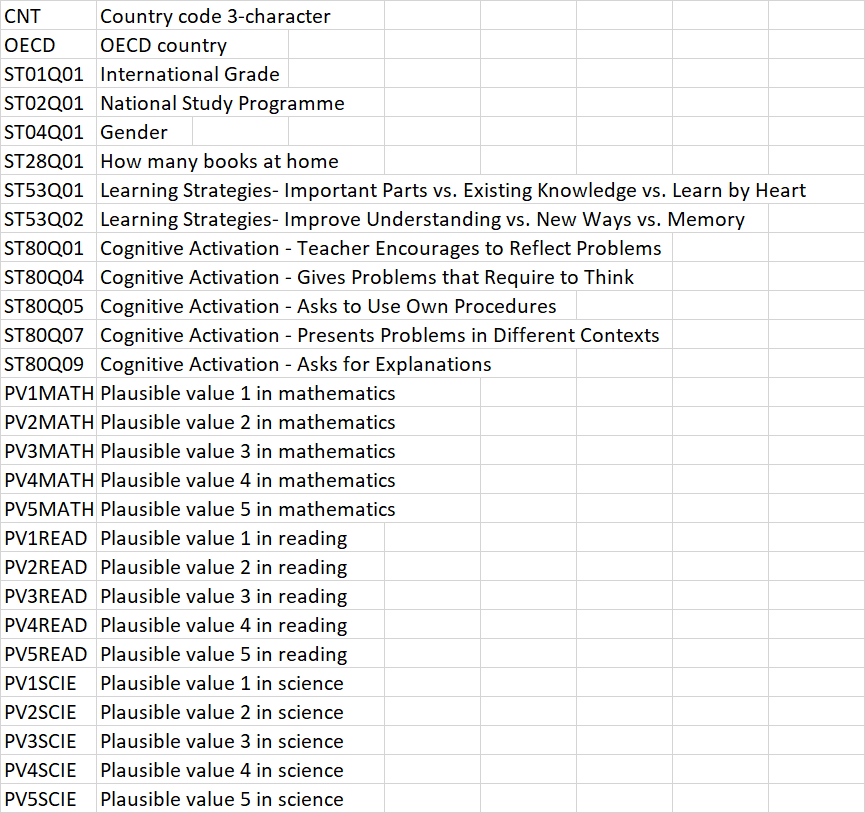

In [8]:
wanted_columns = ['CNT','OECD','ST01Q01','ST02Q01', 'ST04Q01','ST28Q01','ST53Q01','ST53Q02','ST80Q01','ST80Q04','ST80Q05',
                  'ST80Q06','ST80Q07', 'ST80Q08', 'ST80Q09', 'ST80Q10', 'ST80Q11','TIMEINT','PV1MATH','PV2MATH','PV3MATH',
                  'PV4MATH','PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ',
                  'PV5READ', 'PV1SCIE', 'PV2SCIE','PV3SCIE', 'PV4SCIE','PV5SCIE']

In [9]:
df_selected = df[wanted_columns].copy()

In [10]:
df_selected.sample(5)

,CNT,OECD,ST01Q01,ST02Q01,ST04Q01,ST28Q01,ST53Q01,ST53Q02,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,TIMEINT,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
232324,Iceland,OECD,10,1.0,Female,101-200 books,NaN,NaN,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Sometimes,Sometimes,Sometimes,Sometimes,Never or rarely,13.0,529.1401,540.0452,530.6979,515.1192,516.6771,553.7970,580.0092,575.2433,597.4840,594.3068,496.1209,494.2559,499.8508,475.6061,512.9056
74267,Brazil,Non-OECD,11,1.0,Female,0-10 books,by heart,check memory,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,NaN,410.8194,361.7464,416.2720,367.9779,386.6724,441.7992,438.6220,463.2456,458.4797,494.2237,400.0746,367.4375,396.3446,367.4375,384.2223
368378,Norway,OECD,10,1.0,Female,26-100 books,by heart,new ways,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,411.9878,366.8095,390.9565,446.2611,431.4613,520.3565,495.7329,490.9670,549.7460,479.0524,413.7822,369.9552,363.4278,469.7314,393.2674
33877,Australia,OECD,10,1.0,Male,26-100 books,NaN,NaN,Often,Often,Often,Sometimes,Often,Often,Often,Always or almost always,Always or almost always,51.0,484.7406,469.9408,509.6666,479.2881,452.0252,449.3116,471.7660,497.4283,430.0649,450.9155,436.1619,447.3517,489.3137,426.8370,442.6893
372314,New Zealand,OECD,11,1.0,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394.4618,431.0718,425.6193,413.9352,431.0718,404.8036,432.8717,407.2095,407.2095,350.2713,347.4823,392.2417,340.9549,372.6595,342.8198


In [11]:
# renaming the selected columns so that it is easier to understand
df_selected.rename(columns=
                   {'CNT':'country', 
                    'OECD':'OECD', 
                    'ST01Q01':'international_grade',
                    'ST02Q01':'national_study_program', 
                    'ST04Q01':'gender',
                    'ST28Q01':'number_books',
                    'ST53Q01':'Learning_strategies_1',
                    'ST53Q02':'Learning_strategies_2',
                    'ST80Q01':'CA_TeacherEncouragesToReflectProblems',
                    'ST80Q04':'CA_GivesProblemThatRequireToThink',
                    'ST80Q05':'CA_AsksToUseOwnProcedures',
                    'ST80Q06':'CA_PresentsProblemsWithNoObviousSolutions',
                    'ST80Q07':'CA_PresentsProblemsInDifferentContexts',
                    'ST80Q08':'CA_HelpsLearnFromMistakes',
                    'ST80Q09':'CA_AsksForExplanation',
                    'ST80Q10':'CA_ApplyWhatTheyLearned',
                    'ST80Q11':'CA_ProblemWithMultipleSolutions',
                    'TIMEINT':'Computer_time'}, inplace=True)

In [12]:
#checking if columns were renamed
df_selected.head(1)

,country,OECD,international_grade,national_study_program,gender,number_books,Learning_strategies_1,Learning_strategies_2,CA_TeacherEncouragesToReflectProblems,CA_GivesProblemThatRequireToThink,CA_AsksToUseOwnProcedures,CA_PresentsProblemsWithNoObviousSolutions,CA_PresentsProblemsInDifferentContexts,CA_HelpsLearnFromMistakes,CA_AsksForExplanation,CA_ApplyWhatTheyLearned,CA_ProblemWithMultipleSolutions,Computer_time,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,Non-OECD,10,1.0,Female,0-10 books,NaN,NaN,Always or almost always,Sometimes,Never or rarely,Always or almost always,Always or almost always,Always or almost always,Always or almost always,Often,Often,NaN,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.342,406.8496,175.7053,218.5981,341.7009,408.84,348.2283,367.8105,392.9877


Each score is represented five time for each participants. so I am going to calculate an average value for each score, it will be easier to work with only one value.

In [13]:
df_selected['math_average'] =  (df_selected['PV1MATH'] + df_selected['PV2MATH']+ 
                                df_selected['PV3MATH'] + df_selected['PV4MATH'] + df_selected['PV5MATH'])/5
df_selected['reading_average'] = (df_selected ['PV1READ'] + df_selected['PV2READ']+ 
                          df_selected['PV3READ'] + df_selected ['PV4READ'] + df_selected['PV5READ'])/5
df_selected['science_average'] = (df_selected['PV1SCIE'] + df_selected ['PV2SCIE']+ 
                          df_selected['PV3SCIE'] + df_selected['PV4SCIE'] + df_selected['PV5SCIE'])/5

In [14]:
df_selected.head(1)

,country,OECD,international_grade,national_study_program,gender,number_books,Learning_strategies_1,Learning_strategies_2,CA_TeacherEncouragesToReflectProblems,CA_GivesProblemThatRequireToThink,CA_AsksToUseOwnProcedures,CA_PresentsProblemsWithNoObviousSolutions,CA_PresentsProblemsInDifferentContexts,CA_HelpsLearnFromMistakes,CA_AsksForExplanation,CA_ApplyWhatTheyLearned,CA_ProblemWithMultipleSolutions,Computer_time,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,math_average,reading_average,science_average
0,Albania,Non-OECD,10,1.0,Female,0-10 books,NaN,NaN,Always or almost always,Sometimes,Never or rarely,Always or almost always,Always or almost always,Always or almost always,Always or almost always,Often,Often,NaN,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.342,406.8496,175.7053,218.5981,341.7009,408.84,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348


In [15]:
#since I no longoer need the individuals values for the dataframe, I am going to simply drop them
df_selected.drop(['PV1MATH', 'PV2MATH','PV3MATH', 'PV4MATH','PV5MATH','PV1READ','PV2READ','PV3READ','PV4READ','PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], axis=1, inplace=True)

In [16]:
df_selected.head()

,country,OECD,international_grade,national_study_program,gender,number_books,Learning_strategies_1,Learning_strategies_2,CA_TeacherEncouragesToReflectProblems,CA_GivesProblemThatRequireToThink,CA_AsksToUseOwnProcedures,CA_PresentsProblemsWithNoObviousSolutions,CA_PresentsProblemsInDifferentContexts,CA_HelpsLearnFromMistakes,CA_AsksForExplanation,CA_ApplyWhatTheyLearned,CA_ProblemWithMultipleSolutions,Computer_time,math_average,reading_average,science_average
0,Albania,Non-OECD,10,1.0,Female,0-10 books,NaN,NaN,Always or almost always,Sometimes,Never or rarely,Always or almost always,Always or almost always,Always or almost always,Always or almost always,Often,Often,NaN,366.18634,261.01424,371.91348
1,Albania,Non-OECD,10,1.0,Female,201-500 books,relating to known,Improve understanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470.56396,384.68832,478.12382
2,Albania,Non-OECD,9,1.0,Female,More than 500 books,Most important,Improve understanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505.53824,405.18154,486.60946
3,Albania,Non-OECD,9,1.0,Female,11-25 books,relating to known,new ways,Always or almost always,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never or rarely,NaN,449.45476,477.46376,453.97240
4,Albania,Non-OECD,9,1.0,Female,101-200 books,NaN,NaN,Always or almost always,Often,Sometimes,Often,Often,Often,Always or almost always,Often,Often,NaN,385.50398,256.01010,367.15778


In [17]:
# I am now going to save the new dataframe to a csv file so that is quicker to laod 
df_selected.to_csv('PISA_cognition.csv', encoding='utf-8', index=False)

In [18]:
df_cognition = pd.read_csv('PISA_cognition.csv', encoding='utf-8')
df_cognition.head()

,country,OECD,international_grade,national_study_program,gender,number_books,Learning_strategies_1,Learning_strategies_2,CA_TeacherEncouragesToReflectProblems,CA_GivesProblemThatRequireToThink,CA_AsksToUseOwnProcedures,CA_PresentsProblemsWithNoObviousSolutions,CA_PresentsProblemsInDifferentContexts,CA_HelpsLearnFromMistakes,CA_AsksForExplanation,CA_ApplyWhatTheyLearned,CA_ProblemWithMultipleSolutions,Computer_time,math_average,reading_average,science_average
0,Albania,Non-OECD,10,1.0,Female,0-10 books,NaN,NaN,Always or almost always,Sometimes,Never or rarely,Always or almost always,Always or almost always,Always or almost always,Always or almost always,Often,Often,NaN,366.18634,261.01424,371.91348
1,Albania,Non-OECD,10,1.0,Female,201-500 books,relating to known,Improve understanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470.56396,384.68832,478.12382
2,Albania,Non-OECD,9,1.0,Female,More than 500 books,Most important,Improve understanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505.53824,405.18154,486.60946
3,Albania,Non-OECD,9,1.0,Female,11-25 books,relating to known,new ways,Always or almost always,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never or rarely,NaN,449.45476,477.46376,453.97240
4,Albania,Non-OECD,9,1.0,Female,101-200 books,NaN,NaN,Always or almost always,Often,Sometimes,Often,Often,Often,Always or almost always,Often,Often,NaN,385.50398,256.01010,367.15778


In [19]:
df_cognition['math_average'].isnull().sum().sum(), df_cognition['reading_average'].isnull().sum().sum(), df_cognition['science_average'].isnull().sum().sum()

(0, 0, 0)

In [20]:
#sectioning the data in to 4 groups that I will need to use for later analysis(OECD, Non_OECD, female and male)
OECD = df_cognition.query('OECD == "OECD"')
Non_OECD = df_cognition.query('OECD=="Non-OECD"')
male= df_cognition.query('gender=="Male"')
female = df_cognition.query('gender=="Female"')
#verifying
OECD.shape[0], Non_OECD.shape[0], male.shape[0], female.shape[0]

(295416, 190074, 240426, 245064)

In [21]:
#checking null values in the computer time column, the non_OECD countries seem to be missing a lot of values. checking null values for female and male group
df_cognition['Computer_time'].isnull().sum().sum(), OECD['Computer_time'].isnull().sum().sum(), Non_OECD['Computer_time'].isnull().sum().sum(), female['Computer_time'].isnull().sum().sum(), male['Computer_time'].isnull().sum().sum() 

(188416, 60938, 127478, 95416, 93000)

In [22]:
#replacing missing values by the mean for each group
#sub2['income'].fillna((sub2['income'].mean()), inplace=True)
OECD['Computer_time'].fillna((OECD['Computer_time'].mean()), inplace=True)
Non_OECD['Computer_time'].fillna((Non_OECD['Computer_time'].mean()), inplace=True)
female['Computer_time'].fillna((female['Computer_time'].mean()), inplace=True)
male['Computer_time'].fillna((male['Computer_time'].mean()), inplace=True)

C:\Users\marys\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
#verifying if missing values were filled
OECD['Computer_time'].isnull().sum().sum(), Non_OECD['Computer_time'].isnull().sum().sum(), female['Computer_time'].isnull().sum().sum(), male['Computer_time'].isnull().sum().sum() 

(0, 0, 0, 0)

## Univariate Exploration

> Now we are going to analyze the math, reading and science scores. we will also mostly try to understand th distributions scores. and the proportions of our group of interests, OECD, Non_OECD, boys and girls.

## In general, Students Equally Succeed(or fail) in the field of Math, Reading and Science
> My primary assumption would have been that students succeed more in one subject comparing to others. But I was pleased to see that based on this survey response, students tend to equally succeed (or fail) in all 3 subjects. The mean scores in Math, Reading and Science is the almost the same. the mode is is also very close to the mean and remain almost the same in all 3 subjects. <br>
There is no subject where the average score is significantly higher or smaller than the others. 
It is important to quickly notice that the mean values are slightly below the average of 500. the test are scored on a 1000. 

In [24]:
df_cognition['math_average'].mean(), df_cognition['reading_average'].mean(), df_cognition['science_average'].mean()

(469.65123385442615, 472.0069640898506, 475.80809403002854)

In [25]:
#checking modes values to understand the most common  test scores
df_cognition['math_average'].mode(), df_cognition['reading_average'].mode(), df_cognition['science_average'].mode()

(0    479.36594
 dtype: float64, 0    475.7957
 dtype: float64, 0    475.88586
 dtype: float64)

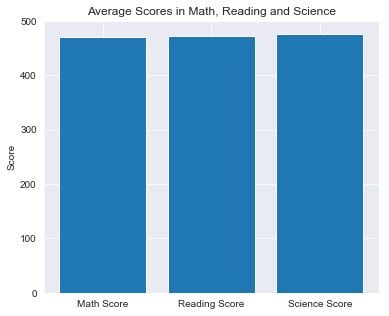

In [26]:
plt.figure(figsize=[6,5])
# plotting Math, Reading and Science Score to see if children tends to succeed more in one  
labels = ["Math Score", "Reading Score", "Science Score"]
usage = [df_cognition['math_average'].mean(),df_cognition['reading_average'].mean(), df_cognition['science_average'].mean()]

# Generating the y positions. Later, we'll use them to replace them with labels.
y_positions = range(len(labels))

# Creating our bar plot
plt.bar(y_positions, usage)
plt.xticks(y_positions, labels)
plt.ylabel("Score")
plt.title("Average Scores in Math, Reading and Science")
plt.show()

<hr>

## Specifics Colors for each group
In this analysis, I will be comparing OECD and Non OECD countries. And Female and Male Students. In order to make the charts easier to read, I will assign to each group a color that I will keep using all the way to the end of the analysis.

<hr>

## Proportions of OECD and Non OECD Countries that particapated in the survey

As I was getting familiar with the dataset, It seemed interesting to know the proportions of OECD and Non_OECD Countries participants  in the survey. there are clearly much more OECD countries participants as they accounts for 60.8% of the survey's participants.

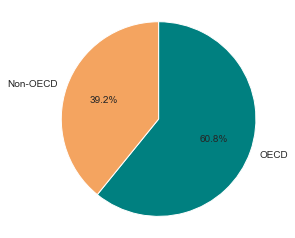

In [52]:
# code for the pie chart seen above
sorted_counts = df_cognition['OECD'].value_counts()
colors = ['#008080', '#F4A460']
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,autopct='%1.1f%%',colors=colors,
        counterclock = False);
plt.axis('square');

## Proportion of Boys and Female Students in the survey
The proportion of boys and girls who participated in the survey is almost equal

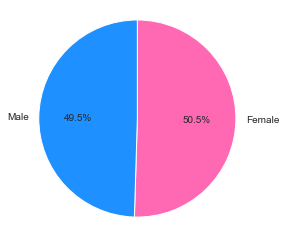

In [28]:
# code for the pie chart seen above
sorted_counts = df_cognition['gender'].value_counts()
colors = ['#FF69B4','#1E90FF']
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,autopct='%1.1f%%',colors=colors,
        counterclock = False);
plt.axis('square');

## Scores Distribution for OECD and Non_OECD Countries

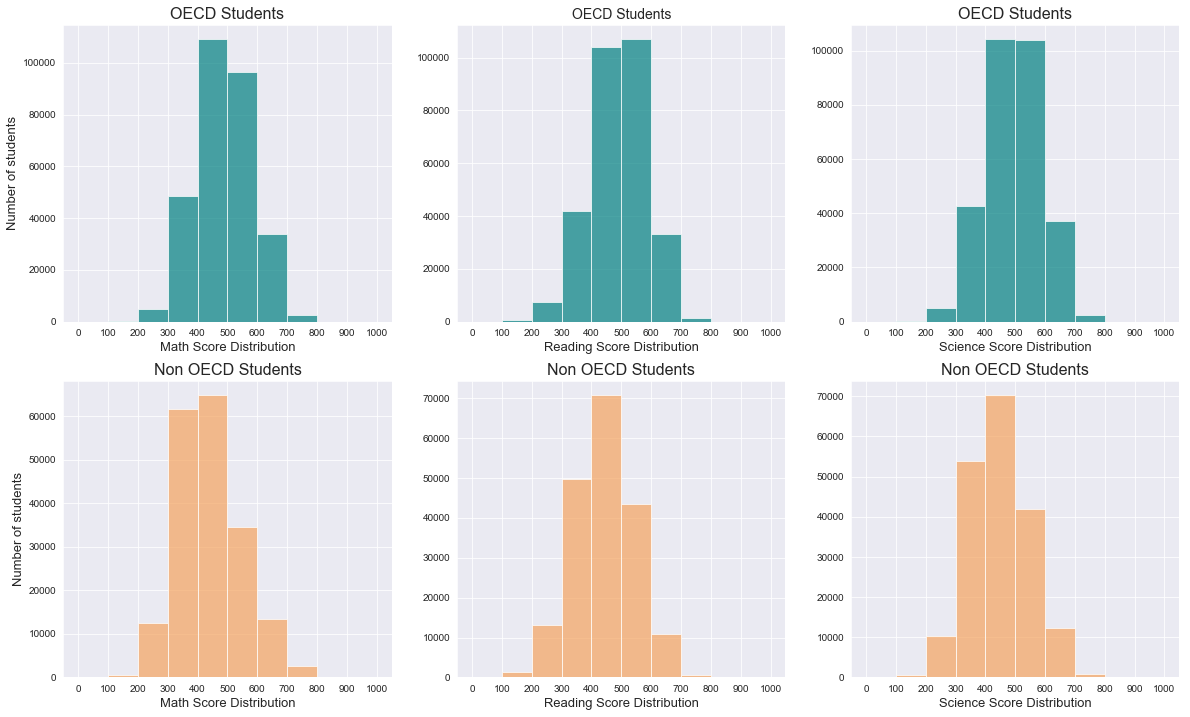

In [100]:
plt.figure(figsize = [20, 12])

bins_hist = np.arange(0, 1000 + 1, 100)
# 1st row  (OECD Countries)
plt.subplot(2, 3, 1)
color_OECD=['#008080']
color_NOECD = ['#F4A460']
xylabel = 13
title =16
plt.hist(OECD['math_average'], bins = bins_hist, alpha = 0.7, color=color_OECD);

plt.xticks(bins_hist)
plt.xlabel('Math Score Distribution',fontsize=xylabel);
plt.ylabel('Number of students',fontsize=xylabel)
plt.title("OECD Students", fontsize=title);

plt.subplot(2, 3, 2)
plt.hist(OECD['reading_average'], bins = bins_hist,  alpha = 0.7, color=color_OECD);

plt.xticks(bins_hist)
plt.xlabel('Reading Score Distribution',fontsize=xylabel);
plt.title("OECD Students",fontsize=14);

plt.subplot(2, 3, 3)
plt.hist(OECD['science_average'], bins = bins_hist, alpha = 0.7, color=color_OECD);

plt.xticks(bins_hist)
plt.xlabel('Science Score Distribution',fontsize=xylabel);
plt.title("OECD Students",fontsize=title);

# 2nd row (Non OECD Countries)

plt.subplot(2, 3, 4)

plt.hist(Non_OECD['math_average'], bins = bins_hist, alpha = 0.7, color=color_NOECD);

plt.xticks(bins_hist)
plt.xlabel('Math Score Distribution',fontsize=xylabel);
plt.ylabel('Number of students',fontsize=xylabel)
plt.title("Non OECD Students", fontsize=title);

plt.subplot(2, 3, 5)
plt.hist(Non_OECD['reading_average'], bins = bins_hist,  alpha = 0.7, color=color_NOECD);

plt.xticks(bins_hist)
plt.xlabel('Reading Score Distribution',fontsize=xylabel);
plt.title("Non OECD Students",fontsize=title);

plt.subplot(2, 3, 6)
plt.hist(Non_OECD['science_average'], bins = bins_hist, alpha = 0.7, color=color_NOECD);

plt.xticks(bins_hist)
plt.xlabel('Science Score Distribution',fontsize=xylabel);
plt.title("Non OECD Students",fontsize=title);

## Scores Distribution for Girls and Boys

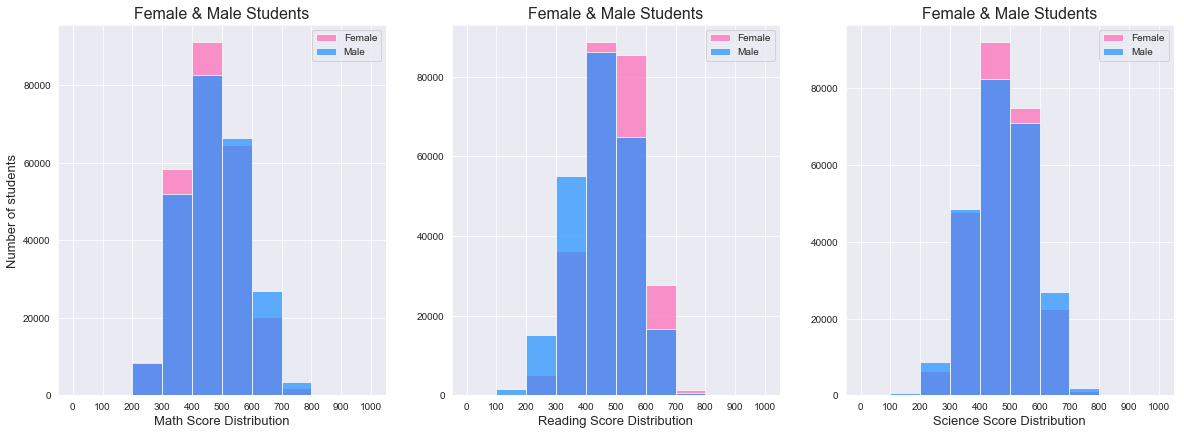

In [151]:
plt.figure(figsize = [20, 15])

bins_hist = np.arange(0, 1000 + 1, 100)
# 1st row  (OECD Countries)
plt.subplot(2, 3, 1)
color_girls= ['#FF69B4']
color_boys = ['#1E90FF']
alpha = 0.7
xylabel = 13
title =16
label = 'Female'
plt.hist(female['math_average'], bins = bins_hist, alpha = alpha, color=color_girls);
plt.hist(male['math_average'], bins = bins_hist, alpha = alpha, color=color_boys);

plt.xticks(bins_hist)
plt.ylabel('Number of students', fontsize=xylabel)
plt.title("Female & Male Students", fontsize=title);
plt.legend([ "Female", "Male"])

plt.xlabel('Math Score Distribution', fontsize=xylabel);
plt.subplot(2, 3, 2)
plt.hist(female['reading_average'], bins = bins_hist,  alpha = alpha, color=color_girls);
plt.hist(male['reading_average'], bins = bins_hist,  alpha = alpha, color=color_boys);
plt.xticks(bins_hist)
plt.xlabel('Reading Score Distribution', fontsize=xylabel);
plt.title("Female & Male Students", fontsize=title);
plt.legend([ "Female", "Male"])

plt.subplot(2, 3, 3)
plt.hist(female['science_average'], bins = bins_hist, alpha = alpha, color=color_girls);
plt.hist(male['science_average'], bins = bins_hist, alpha = alpha, color=color_boys);
plt.xticks(bins_hist)
plt.xlabel('Science Score Distribution', fontsize=xylabel);
plt.title("Female & Male Students", fontsize=title);
plt.legend([ "Female", "Male"]);

## Computer Time Distribution

>We want to see the distribution of computer time in our groups. <br>
In the next section, we look for a possible correlation between the time spent on computer and the scores

In [159]:
# fill missing values with 
OECD['Computer_time'].describe(), Non_OECD['Computer_time'].mode()

(count    295416.000000
 mean         50.590772
 std          36.243653
 min           0.000000
 25%          26.000000
 50%          50.590772
 75%          58.000000
 max         206.000000
 Name: Computer_time, dtype: float64, 0    52.039332
 dtype: float64)

In [32]:
Non_OECD_PC = Non_OECD['Computer_time'].dropna()
Non_OECD_PC.count()

190074

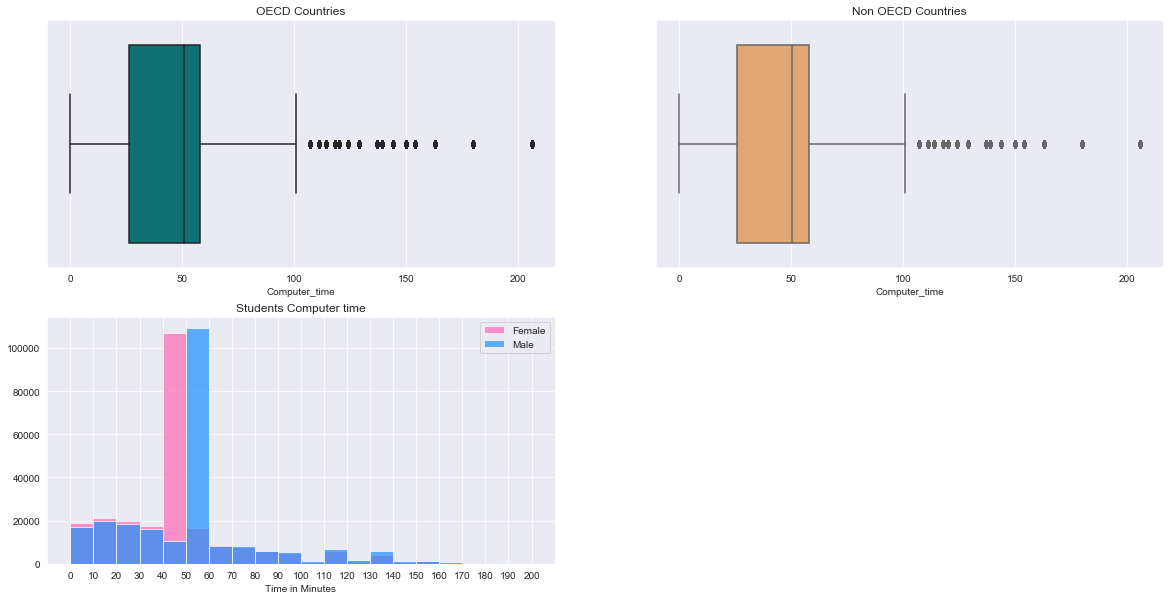

In [158]:
plt.figure(figsize = [20, 10])
color_OECD='#008080'
color_NOECD = '#F4A460'
color_girls= '#FF69B4'
color_boys = '#1E90FF'

bins_hist = np.arange(0,210, 10)
# 1st row  
plt.subplot(2, 2, 1)
ax = sb.boxplot(x=OECD['Computer_time'], color=color_OECD).set_title('OECD Countries')

plt.subplot(2, 2, 2)
ax = sb.boxplot(x=OECD['Computer_time'], color=color_NOECD).set_title('Non OECD Countries')

# 2nd row 
plt.subplot(2, 2, 3)
#ax = sb.violinplot(x=male['Computer_time'], color=color_boys)
plt.hist(female['Computer_time'], bins = bins_hist, alpha = 0.7, color=color_girls);
plt.hist(male['Computer_time'], bins = bins_hist, alpha = 0.7, color=color_boys);
plt.xticks(bins_hist)
plt.xlabel('Time in Minutes');
plt.title("Students Computer time")
plt.legend(["Female", "Male"]);


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

## Cognitive Activity

In [34]:
df_cognition_copy = df_cognition.copy()

In [35]:
#df_likert= df_cognition.drop(['international_grade','national_study_program', 'number_books', 'Learning_strategies_1', 'Learning_strategies_2'], axis=1, inplace=True)
df_likert =df_cognition.copy()
df_likert.drop(['international_grade','national_study_program', 'number_books', 'Learning_strategies_1', 'Learning_strategies_2'], axis=1, inplace=True)

In [36]:
df_likert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 16 columns):
country                                      485490 non-null object
OECD                                         485490 non-null object
gender                                       485490 non-null object
CA_TeacherEncouragesToReflectProblems        314171 non-null object
CA_GivesProblemThatRequireToThink            313521 non-null object
CA_AsksToUseOwnProcedures                    312593 non-null object
CA_PresentsProblemsWithNoObviousSolutions    312490 non-null object
CA_PresentsProblemsInDifferentContexts       312521 non-null object
CA_HelpsLearnFromMistakes                    312591 non-null object
CA_AsksForExplanation                        311814 non-null object
CA_ApplyWhatTheyLearned                      312305 non-null object
CA_ProblemWithMultipleSolutions              312865 non-null object
Computer_time                                297074 non-null float64
math

In [37]:
def unique_values(df, var_list):
     for var in var_list:
         print(var, ' Unique Values:\n', df[var].unique(), '\n')
unique_values(df_likert, df_likert.columns.tolist())

country  Unique Values:
 ['Albania' 'United Arab Emirates' 'Argentina' 'Australia' 'Austria'
 'Belgium' 'Bulgaria' 'Brazil' 'Canada' 'Switzerland' 'Chile' 'Colombia'
 'Costa Rica' 'Czech Republic' 'Germany' 'Denmark' 'Spain' 'Estonia'
 'Finland' 'France' 'United Kingdom' 'Greece' 'Hong Kong-China' 'Croatia'
 'Hungary' 'Indonesia' 'Ireland' 'Iceland' 'Israel' 'Italy' 'Jordan'
 'Japan' 'Kazakhstan' 'Korea' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Latvia' 'Macao-China' 'Mexico' 'Montenegro' 'Malaysia' 'Netherlands'
 'Norway' 'New Zealand' 'Peru' 'Poland' 'Portugal' 'Qatar'
 'China-Shanghai' 'Perm(Russian Federation)' 'Florida (USA)'
 'Connecticut (USA)' 'Massachusetts (USA)' 'Romania' 'Russian Federation'
 'Singapore' 'Serbia' 'Slovak Republic' 'Slovenia' 'Sweden'
 'Chinese Taipei' 'Thailand' 'Tunisia' 'Turkey' 'Uruguay'
 'United States of America' 'Vietnam'] 

OECD  Unique Values:
 ['Non-OECD' 'OECD'] 

gender  Unique Values:
 ['Female' 'Male'] 

CA_TeacherEncouragesToReflectProblems  

In [94]:
#df.pivot(index='date', columns='variable', values='value')
df_likert.groupby('China')

KeyError: 'China'

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

## References:
* PISA 2012 contest winner: http://mi2.mini.pw.edu.pl:8080/SmarterPoland/PISAcontest/
* What is PISA: http://www.oecd.org/pisa/
* OECD: https://en.wikipedia.org/wiki/OECD
* PISA 2012 Countries : http://www.oecd.org/pisa/aboutpisa/pisa-2012-participants.htm
* PISA 2012 Data analysis Manual:http://archivos.agenciaeducacion.cl/Manual_de_Analisis_de_datos_SPSS_version_ingles.pdf
* PISA Data Exploration : https://github.com/brunoassisp/PISA-Data-Viz-project/blob/master/PISA_EDA.ipynb
* Jasccyang github repository : https://github.com/jasccyang/PISA2012/blob/master/Reducing%20File%20Size.ipynb
* Seby Sbirna Github repository: https://github.com/seby-sbirna/Data-Analyst-Nanodegree-Project-Portfolio/blob/master/Project%205%20-%20Communicate%20Data%20Findings/Project%205%20-%20Sebastian%20Sbirna.ipynb
* Visualization: https://www.researchgate.net/figure/Responses-to-Relating-to-your-last-five-publications-how-often-did-you-incorporate-the_fig1_328394497
* Udacity Classroom: https://classroom.udacity.com/nanodegrees/nd002/parts/9f7e8991-8bfb-4103-8307-3b6f93f0ecc7
* BarPlot with matplotlib: https://towardsdatascience.com/data-science-with-python-intro-to-data-visualization-and-matplotlib-5f799b7c6d82
* Pivot table: https://www.dataquest.io/blog/pandas-pivot-table
* Pandas stack:https://stackoverflow.com/questions/49098380/pandas-condense-survey-results
* Reshaping Dataframe: https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
* colors: https://www.rapidtables.com/web/color/RGB_Color.html